In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


There are 6 coins in the image!


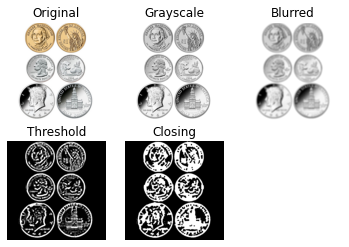

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Calculate Coins
image = cv2.imread("coin.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(img_gray, (21, 21), 8)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total = 0

for cnt in contours:
    area = cv2.contourArea(cnt)

    if area < 10000 or area > 200000:
      continue
    
    total += 1

plt.subplot(231);plt.imshow(image_rgb) ;plt.axis("off"); plt.title("Original")
plt.subplot(232);plt.imshow(img_gray, cmap="gray") ;plt.axis("off"); plt.title("Grayscale")
plt.subplot(233);plt.imshow(gray_blur, cmap="gray") ;plt.axis("off"); plt.title("Blurred")

plt.subplot(234);plt.imshow(thresh, cmap="gray") ;plt.axis("off"); plt.title("Threshold")
plt.subplot(235);plt.imshow(closing, cmap="gray") ;plt.axis("off"); plt.title("Closing")

print("There are %d coins in the image!"%total)

In [7]:
!pwd

/content


In [8]:
cd /content/drive/MyDrive/Colab Notebooks/assignment

/content/drive/MyDrive/Colab Notebooks/assignment
